In [61]:
#pip install geneticalgorithm
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import time 

Dynamic Problem for getting the optimal number of coins

In [26]:
def __coin_matrix__(coinList, changeNum):
    matrix=[[0 for m in range(changeNum+1)]for m in range(len(coinList)+1)]
    for i in range(changeNum+1):
        matrix[0][i]=i
    return matrix

def makeChange(coins,change):
    matrix=__coin_matrix__(coins,change)
    for c in range(1,len(coins)+1):
        for r in range(1,change+1):
            if coins[c-1]==r:
                matrix[c][r]=1
            elif coins[c-1] > r:
                matrix[c][r]=matrix[c-1][r]
            else:
                matrix[c][r] = min(matrix[c-1][r],1+matrix[c][r-coins[c-1]])

    return matrix[-1][-1] #<-- optimal number of coins


8


 The best solution found:                                                                           
 [1. 2. 1.]

 Objective function:
 0.0


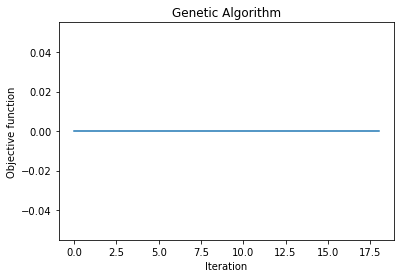

Optimal number of coins = 4
Runtime: 0.5297732353210449s


In [67]:
def f_to_min(x):
    #return ((abs(N-(x*d)).sum())+ x.sum()+1)
    return abs(N-(x*d).sum())*(x.sum()*10*N+1)

d=np.array([3,5,7])
N = 20
a = np.zeros(len(d))                
b = [N//d[-1]]*len(d)
varbound = np.array([a,b]).T

algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.01,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}


  


start = time.time()
model=ga(function=f_to_min,dimension=len(d),variable_type='int',variable_boundaries=varbound)

model.run()
end = time.time()
print("Optimal number of coins = {}".format(makeChange(d,N)))
print("Runtime: {}s".format(end-start))


 The best solution found:                                                                           
 [2. 7. 5. 3. 7. 0.]

 Objective function:
 0.0


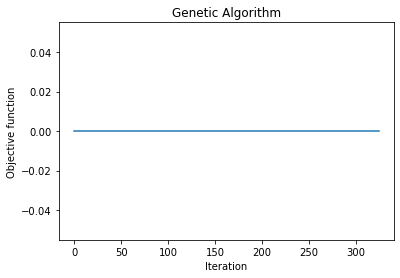

Optimal number of coins = 10
Runtime: 6.284868955612183s


In [68]:

d=np.array([3,5,7,11,13,22])
N = 200
a = np.zeros(len(d))                
b = [N//d[-1]]*len(d)
varbound = np.array([a,b]).T

algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.01,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}


start = time.time()
model=ga(function=f_to_min,dimension=len(d),variable_type='int',variable_boundaries=varbound)

model.run()
end = time.time()
print("Optimal number of coins = {}".format(makeChange(d,N)))
print("Runtime: {}s".format(end-start))


 The best solution found:                                                                           
 [0. 6. 1. 7. 7. 6. 0. 7. 2. 3.]

 Objective function:
 0.0


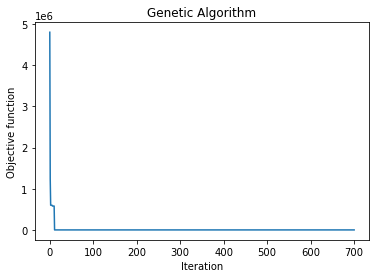

Optimal number of coins = 10
Runtime: 14.32010531425476s


In [69]:

d=np.array([3,5,7,11,13,22,41,89,100,280])
N = 2000
a = np.zeros(len(d))                
b = [N//d[-1]]*len(d)
varbound = np.array([a,b]).T

algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.01,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}


start = time.time()
model=ga(function=f_to_min,dimension=len(d),variable_type='int',variable_boundaries=varbound)

model.run()
end = time.time()
print("Optimal number of coins = {}".format(makeChange(d,N)))
print("Runtime: {}s".format(end-start))
